In [93]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [38]:
data = pd.read_excel('tweets.xlsx',encoding='utf-8')

In [39]:
print data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42368 entries, 0 to 42367
Data columns (total 32 columns):
TweetPostedTime              42368 non-null object
TweetID                      42368 non-null int64
TweetBody                    42368 non-null object
TweetRetweetFlag             42368 non-null bool
TweetSource                  42368 non-null object
TweetInReplyToStatusID       101 non-null float64
TweetInReplyToUserID         189 non-null float64
TweetInReplyToScreenName     189 non-null object
TweetRetweetCount            42368 non-null int64
TweetFavoritesCount          42368 non-null int64
TweetHashtags                42268 non-null object
TweetPlaceID                 1000 non-null object
TweetPlaceName               1000 non-null object
TweetPlaceFullName           1000 non-null object
TweetCountry                 999 non-null object
TweetPlaceBoundingBox        1000 non-null object
TweetPlaceAttributes         0 non-null float64
TweetPlaceContainedWithin    0 non-null fl

In [40]:
#dropping columns which have less than 5% non null values i.e less than 2118 values
columns_to_be_dropped=[]
for column in data.columns:
    if (data[column].isnull().sum() > 0.95*(data.shape[0])):
        columns_to_be_dropped.append(column)
new_data=data.drop(columns_to_be_dropped,axis=1)

In [41]:
new_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42368 entries, 0 to 42367
Data columns (total 21 columns):
TweetPostedTime         42368 non-null object
TweetID                 42368 non-null int64
TweetBody               42368 non-null object
TweetRetweetFlag        42368 non-null bool
TweetSource             42368 non-null object
TweetRetweetCount       42368 non-null int64
TweetFavoritesCount     42368 non-null int64
TweetHashtags           42268 non-null object
UserID                  42368 non-null int64
UserName                42368 non-null object
UserScreenName          42368 non-null object
UserLocation            26342 non-null object
UserDescription         38004 non-null object
UserLink                16599 non-null object
UserExpandedLink        16562 non-null object
UserFollowersCount      42368 non-null int64
UserFriendsCount        42368 non-null int64
UserListedCount         42368 non-null int64
UserSignupDate          42368 non-null object
UserTweetCount          42

In [42]:
# as per time constraints not taking nlp into consideration 
#and dropping columns which may give insights if applied nlp
columns_to_be_dropped1 = ['TweetPostedTime','TweetBody','TweetSource','UserName',\
                          'UserScreenName','UserDescription','UserExpandedLink',\
                          'MacroIterationNumber','UserLink','UserID','UserSignupDate','TweetHashtags']

In [43]:
new_data1=new_data.drop(columns_to_be_dropped1,axis=1)

In [51]:
new_data1.head()

,TweetID,TweetRetweetFlag,TweetRetweetCount,TweetFavoritesCount,UserLocation,UserFollowersCount,UserFriendsCount,UserListedCount,UserTweetCount,UserLocation_encoded
0,811163485052817408,1,1,0,United States,6334,6144,1917,33556,21328
1,811163483463122944,1,1,0,durham nc,154,371,180,3201,21849
2,811163466387988480,0,0,0,Canada,23433,24762,961,147958,16938
3,811163465125679104,1,1,0,"Cypress, Texas, USA",11136,10081,978,28988,17320
4,811163457508642817,1,3065,0,Providence,55,21,31,19581,20177


In [45]:
#feature engineering
#number of hashtags
# new_data1['number_of_hashtags']=0
# for i in range(0,new_data1.shape[0]):
#     new_data1['number_of_hashtags'][i]=str(new_data1['TweetHashtags'][0]).count(',') + 1

In [46]:
#data preprocessing
new_data1['TweetRetweetFlag']=new_data1['TweetRetweetFlag'].astype(int)


In [47]:
le=LabelEncoder()

In [48]:
new_data1['UserLocation_encoded']=le.fit_transform(new_data1['UserLocation'])

In [49]:
#EDA
numeric_feature_columns = list(new_data1._get_numeric_data().columns)
categorical_feature_columns = list(set(new_data1.columns)-set(new_data1._get_numeric_data().columns))
for column in numeric_feature_columns:
    if pd.unique(new_data1[column]).shape[0] < np.sqrt(new_data1.shape[0]):
        categorical_feature_columns.append(column)
        numeric_feature_columns.remove(column)

In [55]:
print "numeric_feature_columns :\n",numeric_feature_columns
print "categorical_feature_columns :\n",categorical_feature_columns

numeric_feature_columns :
[u'TweetID', u'TweetRetweetCount', u'UserFollowersCount', u'UserFriendsCount', u'UserListedCount', u'UserTweetCount']
categorical_feature_columns :
[u'UserLocation', u'TweetRetweetFlag', u'TweetFavoritesCount']


In [68]:
categorical_feature_columns.remove('UserLocation') #to many values
numeric_feature_columns.remove('UserLocation_encoded') #encoded
numeric_feature_columns.remove('TweetRetweetCount') #predictor
numeric_feature_columns.remove('TweetID') #not to be analysed in graph as it is the unique key

ValueError: list.remove(x): x not in list

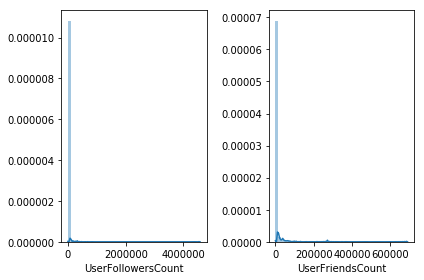

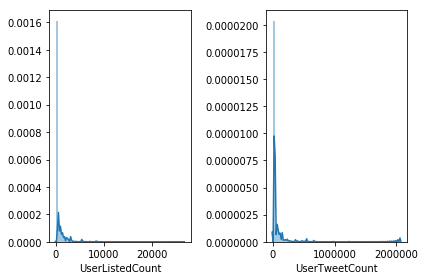

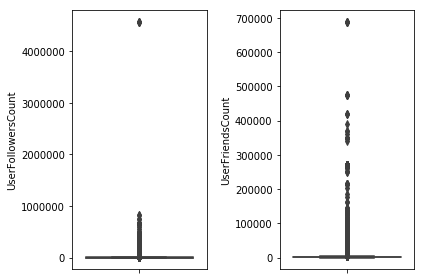

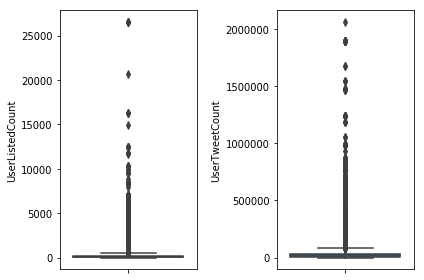

In [62]:
for i in range(0,len(numeric_feature_columns),2):
	if len(numeric_feature_columns)>i+1:
		plt.subplot(121)
		sns.distplot(new_data1[numeric_feature_columns[i]], hist=True, kde=True)
		plt.subplot(122)
		sns.distplot(new_data1[numeric_feature_columns[i+1]], hist=True, kde=True)
		plt.tight_layout()
	else:
		sns.distplot(new_data1[numeric_feature_columns[i]], hist=True, kde=True)
	plt.show()
for i in range(0,len(numeric_feature_columns),2):
	if len(numeric_feature_columns)>i+1:
		plt.subplot(121)
		sns.boxplot(None, numeric_feature_columns[i],data = new_data1)
		plt.subplot(122)
		sns.boxplot(None, numeric_feature_columns[i+1],data = new_data1)
		plt.tight_layout()
	else:
		sns.boxplot(None, numeric_feature_columns[i],data = new_data1)
	plt.show()

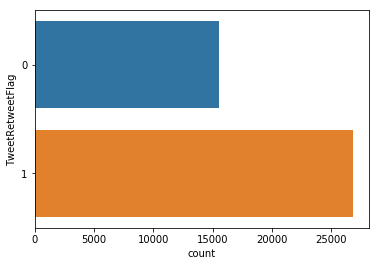

In [71]:
sns.countplot(y=categorical_feature_columns[0], data=new_data1)
plt.show() 

In [77]:
#Data modelling
train,test = model_selection.train_test_split(new_data1,test_size=0.2,random_state=0)

In [82]:
X_train=train[['TweetID','TweetRetweetFlag','TweetFavoritesCount','UserFollowersCount',\
              'UserFriendsCount','UserListedCount','UserTweetCount',\
              'UserLocation_encoded']]
X_test=test[['TweetID','TweetRetweetFlag','TweetFavoritesCount','UserFollowersCount',\
              'UserFriendsCount','UserListedCount','UserTweetCount',\
              'UserLocation_encoded']]

In [84]:
Y_train=train['TweetRetweetCount']
y_test=test['TweetRetweetCount']

In [87]:
LR = LinearRegression()
LR.fit(X=X_train,y=Y_train)
y_pred = LR.predict(X_test)

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clf = GridSearchCV(LogR, param_grid)
clf.estimator

In [90]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

1075.6585036419042


In [101]:
LR = linear_model.Lasso(alpha=0.000001)
LR.fit(X=X_train,y=Y_train)
y_pred = LR.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

1075.6585036181446
